# DIABOLO


In [1]:
allure_etudier=1



In [2]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
#from  pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)

import pandas as pd
import numpy as np

import platform
import sys

import sklearn


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy
from scipy.stats import randint as sp_randint


from treeinterpreter import treeinterpreter as ti

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from itertools import *

import graphviz as gv

import pydotplus
import io
from scipy import misc
import time


# environnement

In [3]:
print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.16299-SP0
Python version is........... 3.6.3
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.13.3
matplotlib version is....... 2.1.2
scipy version is....... 1.0.0


In [4]:
# SELCTION DATAFRAME
def ConstruireDataFrame_one(df):
    
    df_gagnant = df    
    
    # les lignes sans GAIN sont éliminées
    df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
    
    #les lignes sans arrivée n'apporte rien
    df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée

    print(df_gagnant.shape)
    return df_gagnant


def CorrelationDesVariable(df_gagnant):
    
    fig2, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)
    plt.show()
    
    #--------------------------SEPARATION DES DONNES------------------------------
def split_dataset(dataset, train_percentage, feature_headers, target_header):

    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers],  dataset[target_header],
                                                        train_size=train_percentage, random_state=42)
     # Train and Test dataset size details
    print("--------------------------------")    
    print ("Train_x Shape :: ", train_x.shape)    
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)    
    print ("Test_y Shape :: ", test_y.shape)
    print("--------------------------------")
    
    
    return train_x, test_x, train_y, test_y

    #---------------CLASSIFICATION FOREST------------------------


def classificationTree(criterion, splitter,max_leaf_nodes, min_samples_split):    
    #ESTIMATEUR : arbre avec classification
    
    #### c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=17,min_samples_split=5000)
    
    c=DecisionTreeClassifier(criterion,splitter, max_leaf_nodes,min_samples_split)
    print(c.class_weight)
    
    
    
    
    return c




#---------------------------------------------------------------------------------
def show_arbre(arbre, my_Features, path):
    
    f=io.StringIO()

    
    export_graphviz(arbre, out_file=f, feature_names=my_Features,class_names=["0","1"],filled=1,
                    label="all",impurity=1,proportion=1,rotate=1,rounded=1 )
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(img)
    
    plt.show()
    
#--------------------------------------------------------------------------------------
def lecture_data(Fichier, xnames, xindex_col):
    
                    df=pd.read_csv (Fichier,
                                       index_col=xindex_col, 
                                       sep=';',
                                       names=xnames,skipinitialspace=True,
                                       encoding='Latin-1' )
                        
       
                    #Suppression de la collone TROT
                    df.drop(["FIN_ligne"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["PAR_NP"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                 #   df.drop(["PAR_COTEDER"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["cendre"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    ##df.drop(["autostart"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["grande_piste"], axis=1, inplace=True)
                    df.drop(["CO_DISTANCE"], axis=1, inplace=True)
                    df.drop(["musique"], axis=1, inplace=True)
                    
                    #df.drop(["PAR_CLASSE_AGE"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_ECART_GAGNANT"], axis=1, inplace=True)
                   # df.drop(["PAR_ENT_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_VICTOIRE"], axis=1, inplace=True)
                    #df.drop(["PAR_GAIN"], axis=1, inplace=True)
                    
                    #df.drop(["PAR_CARRIERE_Q"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_REU_PLACE"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_REUSSITE_GAGNE"], axis=1, inplace=True)
                    
                   # df.drop(["pAR_JOC_ECART_GAGNANT"], axis=1, inplace=True)
                    #df.drop(["PAR_JOC_ECART_PLACE"], axis=1, inplace=True)
                    #df.drop(["PAR_JOC_NB_COURSE"], axis=1, inplace=True)
                    #df.drop(["CO_PRIX"], axis=1, inplace=True)
                    #df.drop(["PAR_CARRIERE"], axis=1, inplace=True)
                    #df.drop(["PAR_CARRIERE_Q"], axis=1, inplace=True)
                   # df.drop(["pAR_JOC_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
                
                    #df.drop(["PAR_COTEDER"], axis=1, inplace=True)
                    #df.drop(["Nb_partant"], axis=1, inplace=True)
                    df.drop(["autostart"], axis=1, inplace=True)







                    return df 



    

In [5]:
#Tracer les courbes d'apprentissage
def Plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,
                                                            cv = cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

In [6]:
def my_drop(df,col):
    if col in df:
        df.drop([col], axis=1, inplace=True)
    return df    

#  LECTURE DES DONNES

In [7]:
xnames=['ALLURE'
                    ,'CO_DISTANCE',
                    'CO_PRIX',
                    'IDCOURSE',
                    'IDPARTCIPANT',
                    'PAR_ARRIVE',
                    'PAR_CARRIERE',
                    'PAR_CARRIERE_Q' ,
                    'PAR_CLASSE_AGE',
                    'PAR_COTEDER',
                    'PAR_ENT_ECART_GAGNANT',
                    'PAR_ENT_RAPPORT_GAGNANT_M',
                    'PAR_ENT_REU_PLACE',
                    'PAR_ENT_REUSSITE_GAGNE',
                    'PAR_ENT_VICTOIRE',
                    'PAR_GAIN',
                    'pAR_JOC_ECART_GAGNANT',
                    'PAR_JOC_ECART_PLACE',
                    'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                    'pAR_JOC_RAPPORT_GAGNANT_M',
                    'PAR_JOC_REU_PLACE',
                    'pAR_JOC_REUSSITE_GAGNE',
                    'pAR_JOC_VICTOIRE',
                    'PAR_NP',
                    'PAR_NUM',
                    'PAR_PLACE',
                    'PAR_PLACE_Q',
                    'PAR_REUSSITE_3P',
                    'PAR_REUSSITE_GAGNE',
                    'PAR_REUSSITE_QUINTE',
                    'PAR_RUESSITE_PLACE',
                    'autostart',
                    'cendre',
                    'grande_piste',
                    'Point',
                    'Nb_partant','musique','FIN_ligne']

df=lecture_data('d:\diabollo_al_1.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

df_numero_a_predire=lecture_data('d:\diabollo_al_1_D.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

print(" df ",df.shape)
print("")
print(" df_numero_a_predire ",df_numero_a_predire.shape)
print(df.dtypes) # lignes = observations

df.head()


 df  (440349, 29)

 df_numero_a_predire  (898, 29)
ALLURE                       float64
CO_PRIX                      float64
PAR_ARRIVE                   float64
PAR_CARRIERE                 float64
PAR_CARRIERE_Q               float64
PAR_CLASSE_AGE               float64
PAR_COTEDER                  float64
PAR_ENT_ECART_GAGNANT        float64
PAR_ENT_RAPPORT_GAGNANT_M    float64
PAR_ENT_REU_PLACE            float64
PAR_ENT_REUSSITE_GAGNE       float64
PAR_ENT_VICTOIRE             float64
PAR_GAIN                     float64
pAR_JOC_ECART_GAGNANT        float64
PAR_JOC_ECART_PLACE          float64
PAR_JOC_NB_COURSE            float64
PAR_JOC_PLACE_3P             float64
pAR_JOC_RAPPORT_GAGNANT_M    float64
PAR_JOC_REU_PLACE            float64
pAR_JOC_REUSSITE_GAGNE       float64
pAR_JOC_VICTOIRE             float64
PAR_PLACE                    float64
PAR_PLACE_Q                  float64
PAR_REUSSITE_3P              float64
PAR_REUSSITE_GAGNE           float64
PAR_REUSSITE_QUINTE     

,,,ALLURE,CO_PRIX,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,...,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,Point,Nb_partant
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,,,,,,,,,,,,,,,,,,
563653.0,45585.0,3.0,1.0,95000.0,4.0,73.0,11.0,37764.0,14.0,1.0,5.71,0.27,...,0.02,1.0,10.0,1.0,0.205480,0.068493,0.000000,0.136986,196.0,13.0
563909.0,45607.0,8.0,1.0,5000.0,99.0,35.0,0.0,933.0,61.0,15.0,4.72,0.30,...,0.05,2.0,2.0,0.0,0.085714,0.028571,0.000000,0.057143,156.0,14.0
563654.0,45585.0,4.0,1.0,95000.0,1.0,57.0,14.0,36756.0,5.0,10.0,14.40,0.20,...,0.08,61.0,10.0,2.0,0.350877,0.175439,0.017544,0.175439,231.0,13.0
563910.0,45607.0,9.0,1.0,5000.0,99.0,30.0,0.0,975.0,87.0,0.0,0.00,0.06,...,0.00,0.0,2.0,0.0,0.100000,0.033333,0.000000,0.066667,66.0,14.0
563655.0,45585.0,5.0,1.0,95000.0,99.0,66.0,15.0,34724.0,9.0,0.0,0.00,0.00,...,0.02,4.0,11.0,5.0,0.303030,0.136364,0.030303,0.166667,198.0,13.0


In [8]:
df=df.groupby("ALLURE")     
df=df.get_group(allure_etudier)
df.head()
#Suppression de la collone TROT
#df.drop(["ALLURE"], axis=1, inplace=True)
df=my_drop(df,'ALLURE')




In [9]:
df_numero_a_predire=df_numero_a_predire.groupby("ALLURE") 
df_numero_a_predire=df_numero_a_predire.get_group(allure_etudier) 

df_numero_a_predire=my_drop(df_numero_a_predire,'ALLURE')
df_numero_a_predire=my_drop(df_numero_a_predire,'PAR_ARRIVE')
df_numero_a_predire.head()

,,,CO_PRIX,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,...,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,Point,Nb_partant
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,,,,,,,,,,,,,,,,,,
603823.0,48806.0,4.0,54000.0,46.0,3.0,28328.0,11.0,0.0,6.57,0.30,0.13,38.0,...,0.16,46.0,12.0,1.0,0.456522,0.195652,0.0,0.260870,186.0,18.0
604591.0,48869.0,18.0,22000.0,39.0,0.0,17054.0,18.0,0.0,8.11,0.33,0.09,10.0,...,0.07,7.0,13.0,0.0,0.538462,0.205128,0.0,0.333333,256.0,18.0
603824.0,48806.0,5.0,54000.0,59.0,3.0,25036.0,49.0,2.0,3.50,0.14,0.14,1.0,...,0.04,1.0,12.0,0.0,0.474576,0.271186,0.0,0.203390,142.0,18.0
604592.0,48871.0,1.0,5000.0,41.0,0.0,4785.0,13.0,0.0,0.00,0.00,0.00,0.0,...,0.14,1.0,6.0,0.0,0.195122,0.048780,0.0,0.146342,119.0,16.0
603825.0,48806.0,6.0,54000.0,63.0,5.0,25376.0,12.0,1.0,5.36,0.37,0.19,15.0,...,0.11,152.0,16.0,2.0,0.571429,0.317460,0.0,0.253968,250.0,18.0


In [10]:
print(" df ",df.shape)
print("")
print(" df_numero_a_predire ",df_numero_a_predire.shape)

 df  (210282, 28)

 df_numero_a_predire  (656, 27)


In [11]:
# trvail sur les courses de trot (allure=1)
# dimensions

print(df.shape) # lignes = observations
print(df.dtypes) # lignes = observations


(210282, 28)
CO_PRIX                      float64
PAR_ARRIVE                   float64
PAR_CARRIERE                 float64
PAR_CARRIERE_Q               float64
PAR_CLASSE_AGE               float64
PAR_COTEDER                  float64
PAR_ENT_ECART_GAGNANT        float64
PAR_ENT_RAPPORT_GAGNANT_M    float64
PAR_ENT_REU_PLACE            float64
PAR_ENT_REUSSITE_GAGNE       float64
PAR_ENT_VICTOIRE             float64
PAR_GAIN                     float64
pAR_JOC_ECART_GAGNANT        float64
PAR_JOC_ECART_PLACE          float64
PAR_JOC_NB_COURSE            float64
PAR_JOC_PLACE_3P             float64
pAR_JOC_RAPPORT_GAGNANT_M    float64
PAR_JOC_REU_PLACE            float64
pAR_JOC_REUSSITE_GAGNE       float64
pAR_JOC_VICTOIRE             float64
PAR_PLACE                    float64
PAR_PLACE_Q                  float64
PAR_REUSSITE_3P              float64
PAR_REUSSITE_GAGNE           float64
PAR_REUSSITE_QUINTE          float64
PAR_RUESSITE_PLACE           float64
Point                    

# TYPAGE du DATAFRAME AVEC ARRIVE

# DF_GAGNANT

In [12]:
#gagnant
#sélection des chevaux dans les 5 premiers


df_gagnant = df



# les lignes sans GAIN sont éliminées
#df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
#df_gagnant=df_gagnant[df_gagnant.PAR_GAIN <1000000] # On garde les lignes avec GAIN


#df_gagnant=df_gagnant[df_gagnant.Nb_partant >5] # On garde les lignes avec GAIN
#df_gagnant=df_gagnant[df_gagnant.Nb_partant <16] # On garde les lignes avec GAIN
#df_gagnant.drop(["Nb_partant"], axis=1, inplace=True)

#les lignes sans arrivée n'apporte rien
df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée
#df_gagnant=df_gagnant[df_gagnant.CO_PRIX<50000] # On garde la ligne qui possede information arrivée
# trvail sur les courses de trot (allure=1)
print(df.shape) # description de l'ensemble
print(df_gagnant.shape) # description de l'ensemble



(210282, 28)
(210156, 28)


In [13]:



COLUM=df_gagnant.columns
COLUM



Index(['CO_PRIX', 'PAR_ARRIVE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q',
       'PAR_CLASSE_AGE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT',
       'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE',
       'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN',
       'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE',
       'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE',
       'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_PLACE',
       'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant'],
      dtype='object')

In [14]:
#pd.DataFrame.hist(df_gagnant, figsize = [15,15]);

# CORRELATION DES DONNEE AVEC CHEVAUX PARMI LES 3 PREMIERS

In [15]:
# Creating bins for the win column
def assign_selection(W):
    
    if W >=1 and W <=3:
        return 1
    if W >3:
        return 0
    


In [16]:

#df_gagnant['SELECTION'] = (df_gagnant.PAR_ARRIVE<=3).astype(int)
df_gagnant['SELECTION'] = df_gagnant['PAR_ARRIVE'].apply(assign_selection)
#Suppression de la colonne PAR_ARRIVE
#longueur
nb=len(df_gagnant)

df_gagnant.drop(["PAR_ARRIVE"], axis=1, inplace=True)



print(df_gagnant.shape) # description de l'ensemble


(210156, 28)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Les plus forte correlations avec SELECTION sont :

 PAR_REUSSITE_3P
 Point
 PAR_JOC_REU_PLACE


PAR_REUSSITE_GAGNE
PAR_ENT_REU_PLACE
PAR_JOC_REUSSITE_GAGNE
PAR_ENT_REUSSITE_GAGNE
PAR_JOC_NB_COURSE
PAR_JOC_PLACE_3P
PAR_JOC_VICTOIRE
PAR_ENT_VICTOIRE







In [17]:

COLUM=df_gagnant.columns
print(COLUM)
print(df_gagnant.shape) # description de l'ensemble


Index(['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant',
       'SELECTION'],
      dtype='object')
(210156, 28)


In [18]:
print(df_gagnant.shape) # description de l'ensemble
nb_collone=len(df_gagnant.columns)-1
print("nb feature ",nb_collone)

Lib_features = list(df_gagnant.columns[:nb_collone]) # Liebllé des variable DATA

#---------------------------------------------------
feature_columns = Lib_features
#feature_columns=["Point","PAR_RUESSITE_PLACE","PAR_REUSSITE_QUINTE","PAR_ENT_REUSSITE_GAGNE","PAR_REUSSITE_3P","PAR_PLACE_Q","PAR_PLACE","pAR_JOC_VICTOIRE"]
n_features =len(feature_columns)
#---------------------------------------------------

print(feature_columns)
lib_cible =  "SELECTION" # libellé de la variable CIBLE
response_column = "SELECTION"


my_Features=["Point","PAR_COTEDER"]


(210156, 28)
nb feature  27
['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant']


In [19]:
#pd.DataFrame.hist(df_gagnant, figsize = [15,15]);

#  SEPARATION DES DONNEES

# Training et Test

In [20]:
df_scale = df_gagnant.copy()
print("--------------------------------")
print("features",feature_columns)
print("")
print("Cible",response_column)

train_x, test_x, train_y, test_y = split_dataset(df_gagnant, 0.70, feature_columns, response_column)    

#print(df_gagnant.columns) # description de l'ensemble
print(train_x.columns) # description de l'ensemble
print("--------------------------------")

--------------------------------
features ['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant']

Cible SELECTION
--------------------------------
Train_x Shape ::  (147109, 27)
Train_y Shape ::  (147109,)
Test_x Shape ::  (63047, 27)
Test_y Shape ::  (63047,)
--------------------------------
Index(['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
#from sklearn.preprocessing import StandardScaler
#mms=StandardScaler()
#train_x=mms.fit_transform(train_x)
#test_x=mms.transform(test_x)


In [22]:
# Définir une classe TIme au temps d'exécution total de l'ordinateur
class Timer:
  def __init__(self):
    self.start = time.time()

  def restart(self):
    self.start = time.time()

  def get_time(self):
    end = time.time()
    m, s = divmod(end - self.start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str


In [23]:
# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
          
            print("")            

In [24]:
#Définir une méthode pour imprimer la matrice de confusion et les indicateurs de performance
def Print_confusion_matrix(cm, auc, heading):
    print('\n', heading)
    print(cm)
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)
    print('auc......................%7.4f' % auc)

In [25]:
#Définir une fonction d'utilité pour signaler les meilleurs scores
def Report_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [26]:
#Définir une méthode pour tracer une courbe ROC
def ROC_Curve(rf, auc,X_train,y_train,X_test,y_test):
    one_hot_encoder = OneHotEncoder()
    rf_fit = rf.fit(X_train, y_train)
    fit = one_hot_encoder.fit(rf.apply(X_train))
    y_predicted = rf.predict_proba(X_test)[:, 1]
    false_positive, true_positive, _ = roc_curve(y_test, y_predicted)

    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % auc)
    plt.legend(loc='best')
    plt.show()

In [27]:
#Définir une méthode pour tracer l'importance du prédicteur
def Plot_predictor_importance(best_model, feature_columns):
    feature_importance = best_model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    y_pos  = np.arange(sorted_idx.shape[0]) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            feature_importance[sorted_idx], 
            align='center', 
            color='green', 
            ecolor='black', 
            height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_columns)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Predictor Importance')
    plt.show()

In [28]:
# hyper parametres + Construction de l'estimateur + RandomizedSearchCV

In [29]:
# specify parameters and distributions to sample from
param_dist = {"n_estimators": range(20, 100, 2),
                  "max_depth": range(4, 70, 2),
                  "min_samples_leaf": range(2, 2500, 2),
                  "max_features": [None, 2, 4, 6, 8, 10, 12, 14],
                  "min_samples_split": sp_randint(2, 2000),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

# build a classifier
clf = RandomForestClassifier(class_weight = 'balanced')
#clf = RandomForestClassifier()
n_iter_search = 30

estimator = RandomizedSearchCV(clf,
                                   param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   scoring = 'roc_auc',
                                   verbose = 1,
                                   n_jobs = 1)

# FIT

In [30]:
my_timer = Timer()
fit = estimator.fit(train_x,train_y)
elapsed = my_timer.get_time()
print("\nTemps de calcul du FIT  est : %s" % elapsed)     

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 29.5min finished



Temps de calcul du FIT  est : 00:30:15


# Cross Validation + Tracer les courbes d'apprentissage.

In [31]:
my_timer = Timer()
cv_ = ShuffleSplit(n_splits = 20, test_size = 0.20, random_state = 0)
#Plot_learning_curve(estimator,'Learning Curves',train_x, train_y, cv = cv_,n_jobs = 1)
elapsed = my_timer.get_time()
print("\nTemps de calcul est : %s" % elapsed) 


Temps de calcul est : 00:00:00


# affichage score

In [32]:

Report_scores(estimator.cv_results_, n_top = 10)



Model with rank: 1
Mean validation score: 0.781 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 28, 'max_features': 12, 'min_samples_leaf': 148, 'min_samples_split': 152, 'n_estimators': 76}

Model with rank: 2
Mean validation score: 0.780 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 38, 'max_features': 10, 'min_samples_leaf': 140, 'min_samples_split': 851, 'n_estimators': 76}

Model with rank: 3
Mean validation score: 0.776 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 38, 'max_features': 14, 'min_samples_leaf': 828, 'min_samples_split': 1489, 'n_estimators': 26}

Model with rank: 4
Mean validation score: 0.775 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 62, 'max_features': 12, 'min_samples_leaf': 1070, 'min_samples_split': 1913, 'n_estimators': 70}

Model with rank: 5
Mean validation score: 0.775 (std: 0.003)
Parameters: {'bootstrap': True, 'crite

# Meilleur modele :  BEST_MODEL


best_model:
 RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=28, max_features=12,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=148,
            min_samples_split=152, min_weight_fraction_leaf=0.0,
            n_estimators=76, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

best_model Nombre de Feature:  27
best_model  Nombre de sorties :  1
best_model  Classes :  [0 1]

best_model  importance des features :  [  1.61615498e-02   1.13330246e-02   7.75098093e-04   1.97054885e-02
   4.32927378e-01   4.77907115e-03   7.26929895e-03   8.04801859e-03
   3.79413210e-03   6.37743952e-03   2.01699264e-02   4.22029973e-03
   3.46780604e-03   3.15005864e-02   1.00424397e-02   8.07277347e-03
   3.67008755e-02   3.33620475e-03   3.24075515e-03   7.80948772e-03
   1.57674695e-04   1.75889125e-01   2.20702920e-02   1.15584118e-04
   4.2

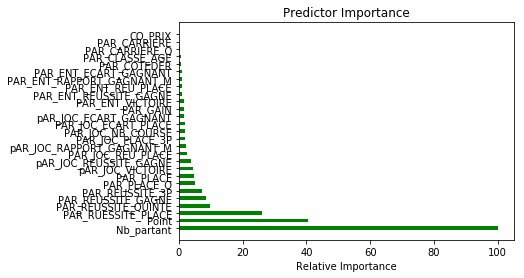


Classification report:
              precision    recall  f1-score   support

          0       0.91      0.71      0.80    114780
          1       0.42      0.74      0.53     32329

avg / total       0.80      0.72      0.74    147109

----------------------------------------------

 Confusion matrics of the training dataset
[[81820 32960]
 [ 8502 23827]]
accuracy................. 0.7182
precision................ 0.4196
recall................... 0.7370
F1....................... 0.5347
auc...................... 0.7249

 CLASSIFICATION CORRECTE DES DONNEES DE TEST : 44607/63047   70.752%
Score de RANDOM Forest Prediction Score sur données de test :   70.752

En nb echantillon
Valeurs correctes sur diagonale droite ...
Prediction      0      1    All
True                           
0           34809  14436  49245
1            4004   9798  13802
All         38813  24234  63047

En pourcentage
Prediction          0        1
True                          
0           89.683869  59.5692
1

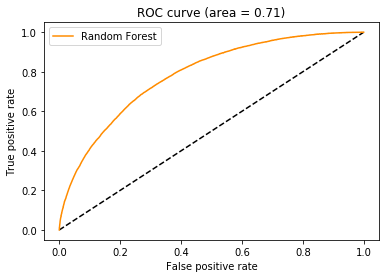


Temps de affichage BEST MODEL : 00:00:52


In [33]:
my_timer = Timer()

best_model = estimator.best_estimator_
print('best_model:\n', best_model)
print('\nbest_model Nombre de Feature: ', best_model.n_features_)
print('best_model  Nombre de sorties : ', best_model.n_outputs_)
print('best_model  Classes : ', best_model.classes_)
print('\nbest_model  importance des features : ', best_model.feature_importances_)
print("")

Plot_predictor_importance(best_model, feature_columns)
y_predicted = best_model.predict(train_x)
probabilities = best_model.predict_proba(train_x)
c_report = classification_report(train_y, y_predicted)
print('\nClassification report:\n', c_report)

y_predicted_train = best_model.predict(train_x)
cm = confusion_matrix(train_y, y_predicted_train)
auc = roc_auc_score(train_y, y_predicted_train)




print("----------------------------------------------")
Print_confusion_matrix(cm, auc, 'Confusion matrics of the training dataset')



y_predicted = best_model.predict(test_x)
cm = confusion_matrix(test_y, y_predicted)
auc = roc_auc_score(test_y, y_predicted)

ntotal = len(test_y)
correct = test_y == y_predicted
numCorrect = sum(correct)
percent = round( (100.0*numCorrect)/ntotal, 6)
print("\n CLASSIFICATION CORRECTE DES DONNEES DE TEST : {0:d}/{1:d} {2:8.3f}%".format(numCorrect, ntotal, percent))
prediction_score = 100.0*best_model.score(test_x, test_y)
print('Score de RANDOM Forest Prediction Score sur données de test : %8.3f' % prediction_score)
print("")
print("En nb echantillon")
print("Valeurs correctes sur diagonale droite ...")
print(pd.crosstab(test_y, y_predicted, rownames=['True'], colnames=['Prediction'], margins=True))
print("")
print("En pourcentage")
print(pd.crosstab(test_y, y_predicted, rownames=['True'], colnames=['Prediction']).apply(lambda r: 100.0 * r/r.sum()))
print("")
y_predicted_test = best_model.predict(test_x)
cm = confusion_matrix(test_y, y_predicted_test)
auc = roc_auc_score(test_y, y_predicted_test)
Print_confusion_matrix(cm, auc, 'Confusion matrics of the test dataset')
ROC_Curve(best_model, auc,train_x,train_y, test_x,test_y)

elapsed = my_timer.get_time()
print("\nTemps de affichage BEST MODEL : %s" % elapsed) 


# PROBA  = Ensemble des probabilités de X_TEST

In [34]:
PROBA=best_model.predict_proba(test_x)
data_frame_proba = pd.DataFrame.from_dict(PROBA)
data_frame_proba.head()
#PROBAL=best_model.predict_log_proba(test_x)

,0,1
0,0.894556,0.105444
1,0.879786,0.120214
2,0.619141,0.380859
3,0.811208,0.188792
4,0.293137,0.706863


# JOUER

In [48]:

df_numero_a_predire[lib_cible] =0
train_x, test_x, train_y, test_y = split_dataset(df_numero_a_predire, 0, feature_columns, response_column)   

test_copy = test_x.copy()

test_x.head()

--------------------------------
Train_x Shape ::  (0, 27)
Train_y Shape ::  (0,)
Test_x Shape ::  (656, 27)
Test_y Shape ::  (656,)
--------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,,,CO_PRIX,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,...,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,Point,Nb_partant
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,,,,,,,,,,,,,,,,,,
604660.0,48875.0,3.0,13000.0,4.0,0.0,130.0,29.0,21.0,4.33,0.22,0.05,3.0,...,0.05,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,68.0,14.0
603915.0,48813.0,3.0,20000.0,56.0,0.0,9305.0,7.0,0.0,0.00,0.00,0.00,0.0,...,0.00,0.0,17.0,0.0,0.446429,0.142857,0.0,0.303571,87.0,12.0
603864.0,48808.0,7.0,120000.0,34.0,1.0,62224.0,15.0,27.0,9.61,0.32,0.07,14.0,...,0.13,199.0,6.0,0.0,0.352941,0.176471,0.0,0.176471,250.0,10.0
603808.0,48805.0,2.0,80000.0,33.0,0.0,13656.0,9.0,6.0,16.40,0.22,0.03,1.0,...,0.11,152.0,9.0,0.0,0.333333,0.060606,0.0,0.272727,207.0,10.0
604525.0,48865.0,7.0,12000.0,8.0,0.0,725.0,53.0,0.0,0.00,0.00,0.00,0.0,...,0.01,1.0,1.0,0.0,0.125000,0.000000,0.0,0.125000,116.0,12.0


In [49]:
#from sklearn.preprocessing import MinMaxScaler
#mms=MinMaxScaler()
#test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)

#from sklearn.preprocessing import StandardScaler
#mms=StandardScaler()
#test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)


In [50]:
y_pred=best_model.predict(test_x)


In [51]:

df_pred = pd.DataFrame.from_dict(y_pred)
#print(df_pred)
print(y_pred)


[0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 1 0 1 0 0 0 0 1 1 1 0 

In [52]:
PROBA=best_model.predict_proba(test_x)


df_proba = pd.DataFrame.from_dict(PROBA)



In [53]:
# ajouter a test_x les collone 0 et 1 (probabilité)


df_final =pd.concat([df_proba,df_pred], axis=1)


df_final.head()



,0,1,0
0,0.860986,0.139014,0
1,0.426715,0.573285,1
2,0.471582,0.528418,1
3,0.378430,0.621570,1
4,0.724027,0.275973,0


In [54]:
test_x = test_copy.copy()

In [55]:
test_x=my_drop(test_x,'PAR_CLASSE_AGE')
test_x=my_drop(test_x,'PAR_ENT_ECART_GAGNANT')
test_x=my_drop(test_x,'PAR_ENT_RAPPORT_GAGNANT_M')
test_x=my_drop(test_x,'PAR_ENT_REU_PLACE')
test_x=my_drop(test_x,'PAR_ENT_REUSSITE_GAGNE')
test_x=my_drop(test_x,'PAR_ENT_VICTOIRE')
test_x=my_drop(test_x,'PAR_GAIN')
test_x=my_drop(test_x,'pAR_JOC_ECART_GAGNANT')
test_x=my_drop(test_x,'PAR_JOC_ECART_PLACE')
test_x=my_drop(test_x,'PAR_JOC_NB_COURSE')
test_x=my_drop(test_x,'PAR_JOC_PLACE_3P')
test_x=my_drop(test_x,'PAR_REUSSITE_GAGNE')
test_x=my_drop(test_x,'PAR_REUSSITE_QUINTE')
test_x=my_drop(test_x,'PAR_RUESSITE_PLACE')
test_x=my_drop(test_x,'CO_PRIX')
test_x=my_drop(test_x,'PAR_CARRIERE')
test_x=my_drop(test_x,'PAR_CARRIERE_Q')
test_x=my_drop(test_x,'pAR_JOC_RAPPORT_GAGNANT_M')
test_x=my_drop(test_x,'pAR_JOC_REUSSITE_GAGNE')
test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
test_x=my_drop(test_x,'PAR_PLACE')
test_x=my_drop(test_x,'PAR_PLACE_Q')
test_x=my_drop(test_x,'PAR_CLASSE_AGE')
test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
test_x=my_drop(test_x,'PAR_REUSSITE_3P')
test_x=my_drop(test_x,'PAR_JOC_REU_PLACE')
test_x=my_drop(test_x,'PAR_COTEDER')
test_x=my_drop(test_x,'musique')
test_x=my_drop(test_x,'Nb_partant')

test_x.head()


,,,Point
IDPARTCIPANT,IDCOURSE,PAR_NUM,
604660.0,48875.0,3.0,68.0
603915.0,48813.0,3.0,87.0
603864.0,48808.0,7.0,250.0
603808.0,48805.0,2.0,207.0
604525.0,48865.0,7.0,116.0


In [56]:
print(test_x.columns)



Index(['Point'], dtype='object')


In [57]:
test_x['v0']=0.0
test_x['v1']=0.0
test_x['sel']=0
#test_x



In [58]:
cumul=1

my_timer = Timer()
nb_rows=len(df_proba.index)

for i in range(0,nb_rows):
    n=df_proba[0][i]
    test_x['v0'][i]=n    
    n=df_proba[1][i]
    test_x['v1'][i]=n      
    #i +=1
    

elapsed = my_timer.get_time()
print("\nTemps de la copie est : %s" % elapsed)     
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.



Temps de la copie est : 00:00:39


In [59]:
test_x.head()

,,,Point,v0,v1,sel
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,
604660.0,48875.0,3.0,68.0,0.860986,0.139014,0
603915.0,48813.0,3.0,87.0,0.426715,0.573285,0
603864.0,48808.0,7.0,250.0,0.471582,0.528418,0
603808.0,48805.0,2.0,207.0,0.378430,0.621570,0
604525.0,48865.0,7.0,116.0,0.724027,0.275973,0


# Recuperation du resultat de la predication sous forme CSV
# Ce fichier est lu par EXE windev !!!!!!!
# Pour chaque course,numero un pourcentage pour chaque classe

In [60]:
test_x.to_csv('d:\py_resultat.csv')

